# Principal Component Analysis 
Fundamentally, a **dimensionality reduction algorithm.**
- Can be useful for: 
    - Visualization
    - Noise filtering
    - Feature extraction and engineering 
- Category: Unsupervised "Estimator"
- Dimensions (features) are not created equally, some are more important then others
- PC1 (horizontal axis, left and right)is the axis that spans the **"MOST"** variation/influence on the principal components ... the weights are called "loadings" and an array of loadings for PC is called an **"eigenvector"**
    - vectors towards the end of the line have more influence (higher score)
- PC2 (vertical axis, up and down)is the axis that spans the **"second most"** variation/influence ont the principal components
    - vectors towards the end of the line have more influence (higher score)

In PCA, the relationship is quantified by finding a list of the "principal" axes in the data, and using those axes to describe the dataset.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; 
%matplotlib inline 

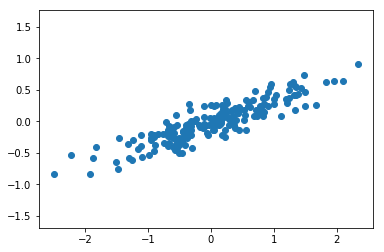

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

#print
print("PCA components")
print(pca.components_)
print('\n')
print('PCA explained varience')
print(pca.explained_variance_)

PCA components
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


PCA explained varience
[0.7625315 0.0184779]


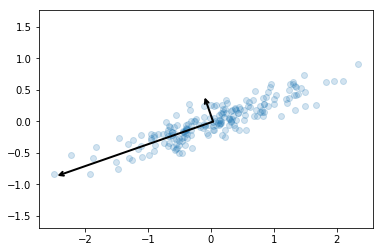

In [4]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the "principal axes" of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data - **its a measure of the variance of the data when projected onto that axis**.

## PCA as dimensionality reduction 

- Goal is to **lower-dimensional projection of the data and preserve the maximal data variance**, by zeroing out one or more of the smallest principal components. 
- Information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the higest variance. 
- The reduced-dimension data is "good enough" to convert important relationships between the points, despite reducing dimesion of data. - **"Majority" of the relationship between the data points are preserved.**


original shape:    (200, 2)
transformed shape: (200, 1)


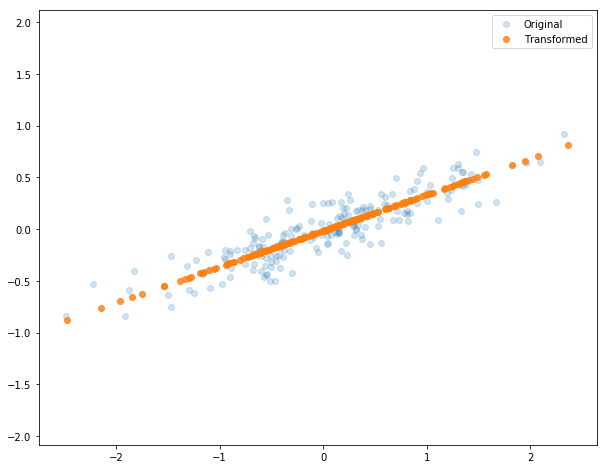

In [12]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)


#The image below shows the transformed data from 2-D to a single dimension.
X_new = pca.inverse_transform(X_pca)
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2, label='Original')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, label='Transformed')
plt.legend()
plt.axis('equal');

## Performing PCA

#### Step 1: Get data

#### Step 2: Subtract the mean
    - subtract mean from each data dimension (StandardScaler ?) produces a mean of zero
#### Step 3: Calculate the covariance matrix 
    - example: 2-D data, the covariance matrix will be 2 x 2 = 4 dimensional
    - which featrues contains the most information/variance in the dataset 
#### Step 4: Calculate the eigenvectors and eigenvalues of the covariance matrix
    - eigenvectors (principal components)
        - provide information about the patterns in the data
        - shows how data sets are related 
    - eigenvalues (importance)
    - selecting principal components with highest eigenvalue preserves maximum variance of original data, preserved variance yields higher sample space density and therefore predicitve power
#### Step 5: Choosing components and forming a feature vector 
    - once the eigenvectors are found from the covariance matrix, the next step is to order them by eigenvalue, highest to lowest
    - genearlly eigenvector with the highest eigenvalue is the principal component
    - for a **feature vector**(matrix of vectors), constructed by taking the eigenvectors we want to keep, and forming a matrix
#### Step 6: Deriving the new data set
    - take the transpose of the vector and multiply it on the left of the original data set, **transposed** 
    - $$FinalData = RowFeatureVector~*~RowDataAdjust$$
    